In [29]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [30]:
bank = pd.read_csv('bank.csv', sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [31]:

bank = bank.rename(columns={
                        'y': 'Target'
                        })

In [32]:
bank['Target']=bank['Target'].replace({'no': 0, 'yes': 1})

In [33]:
bank.shape

(4334, 17)

In [34]:
bank.isnull().values.any()

False

In [35]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous,Target
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,40.991924,1410.637517,15.913936,264.544301,2.806876,39.670974,0.544070,0.115828
std,10.505378,3010.612091,8.216673,260.642141,3.129682,99.934062,1.702219,0.320056
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,440.000000,16.000000,186.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1464.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [36]:
bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,4334,4334,4334,4334,4334,4334,4334,4334,4334
unique,12,3,3,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,942,2680,2306,4261,2476,3650,2801,1339,3555


In [37]:
bank['Target'].value_counts(0)

0    3832
1     502
Name: Target, dtype: int64

In [38]:
bank["job"] = bank["job"].astype('category').cat.codes
bank["marital"] = bank["marital"].astype('category').cat.codes
bank["default"] = bank["job"].astype('category').cat.codes
bank["housing"] = bank["marital"].astype('category').cat.codes
bank["loan"] = bank["loan"].astype('category').cat.codes
bank["contact"] = bank["contact"].astype('category').cat.codes
bank["poutcome"] = bank["poutcome"].astype('category').cat.codes

In [39]:
bank['education']=bank['education'].replace({'primary': 0, 'secondary': 1,'tertiary':2})


In [40]:
bank['month'].replace(['jan', 'feb', 'mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace  = True)

In [41]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,10,1,0,10,1787,1,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,7,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,4,1350,2,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,4,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,1,0,1,0,2,5,5,226,1,-1,0,3,0


In [42]:
target = 'Target'
X = bank.drop(['Target'], axis=1)
y=bank[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [43]:
print(sorted(Counter(y_train).items()))

[(0, 3256), (1, 427)]


In [44]:
print(sorted(Counter(y_test).items()))

[(0, 576), (1, 75)]


In [45]:
standard_scalar = StandardScaler()
X_train_sc = standard_scalar.fit_transform(X_train)
X_test_sc = standard_scalar.transform(X_test)

In [46]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [47]:
clf_random.fit(X_train_sc,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [48]:
y_pred=clf_random.predict(X_test_sc)

In [49]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred,target_names=target_names))


              precision    recall  f1-score   support

          No       0.92      0.98      0.95       576
         Yes       0.67      0.32      0.43        75

    accuracy                           0.90       651
   macro avg       0.79      0.65      0.69       651
weighted avg       0.89      0.90      0.89       651



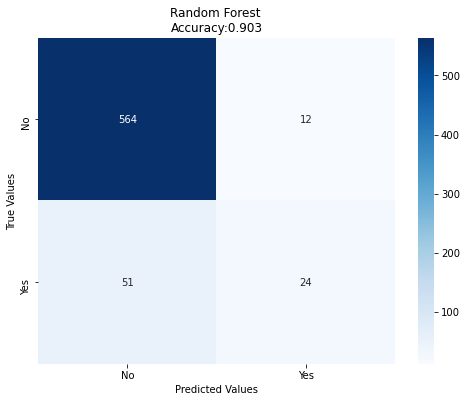

In [50]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['No', 'Yes'], 
                     columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [52]:
standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

In [53]:
clf_random.fit(X_train_sc_resampled,y_resampled)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [54]:
y_pred=clf_random.predict(X_test_sc)

In [55]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred,target_names=target_names))


              precision    recall  f1-score   support

          No       0.95      0.91      0.93       576
         Yes       0.46      0.61      0.53        75

    accuracy                           0.87       651
   macro avg       0.70      0.76      0.73       651
weighted avg       0.89      0.87      0.88       651



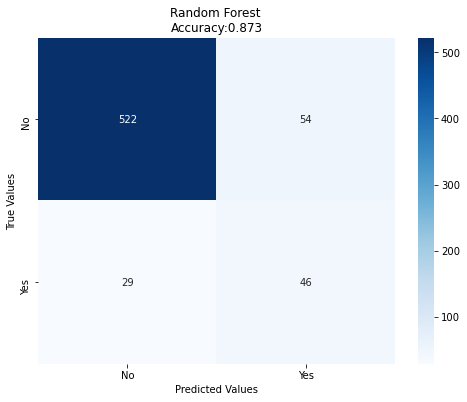

In [56]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['No', 'Yes'], 
                     columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()